# Internal analysis: London Gang

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

## 0. Dataset import

In [3]:
#G = nx.read_edgelist("datasets/reptilia-lizard-network-social.edges", data=(("weight", float),))

df = pd.read_csv("../datasets/london_CSV/LONDON_GANG.csv", index_col=0)

df.index = df.index.astype(int)
df.columns = df.columns.astype(int)

G = nx.from_pandas_adjacency(df)

# 4. Controlla le dimensioni
print(f"Nodi: {G.number_of_nodes()}, Archi: {G.number_of_edges()}")

Nodi: 54, Archi: 315


### Graph visualization

{1: 0.4716981132075472, 2: 0.4150943396226415, 3: 0.4150943396226415, 4: 0.3962264150943396, 5: 0.3584905660377358, 6: 0.3018867924528302, 7: 0.4716981132075472, 8: 0.2830188679245283, 9: 0.3962264150943396, 10: 0.4150943396226415, 11: 0.33962264150943394, 12: 0.4716981132075472, 13: 0.20754716981132074, 14: 0.4528301886792453, 15: 0.1320754716981132, 16: 0.1509433962264151, 17: 0.09433962264150943, 18: 0.2641509433962264, 19: 0.24528301886792453, 20: 0.2830188679245283, 21: 0.3584905660377358, 22: 0.4528301886792453, 23: 0.43396226415094336, 24: 0.11320754716981132, 25: 0.43396226415094336, 26: 0.11320754716981132, 27: 0.1509433962264151, 28: 0.33962264150943394, 29: 0.32075471698113206, 30: 0.09433962264150943, 31: 0.22641509433962265, 32: 0.1320754716981132, 33: 0.18867924528301885, 34: 0.1509433962264151, 35: 0.22641509433962265, 36: 0.22641509433962265, 37: 0.1320754716981132, 38: 0.03773584905660377, 39: 0.03773584905660377, 40: 0.03773584905660377, 41: 0.09433962264150943, 42: 0

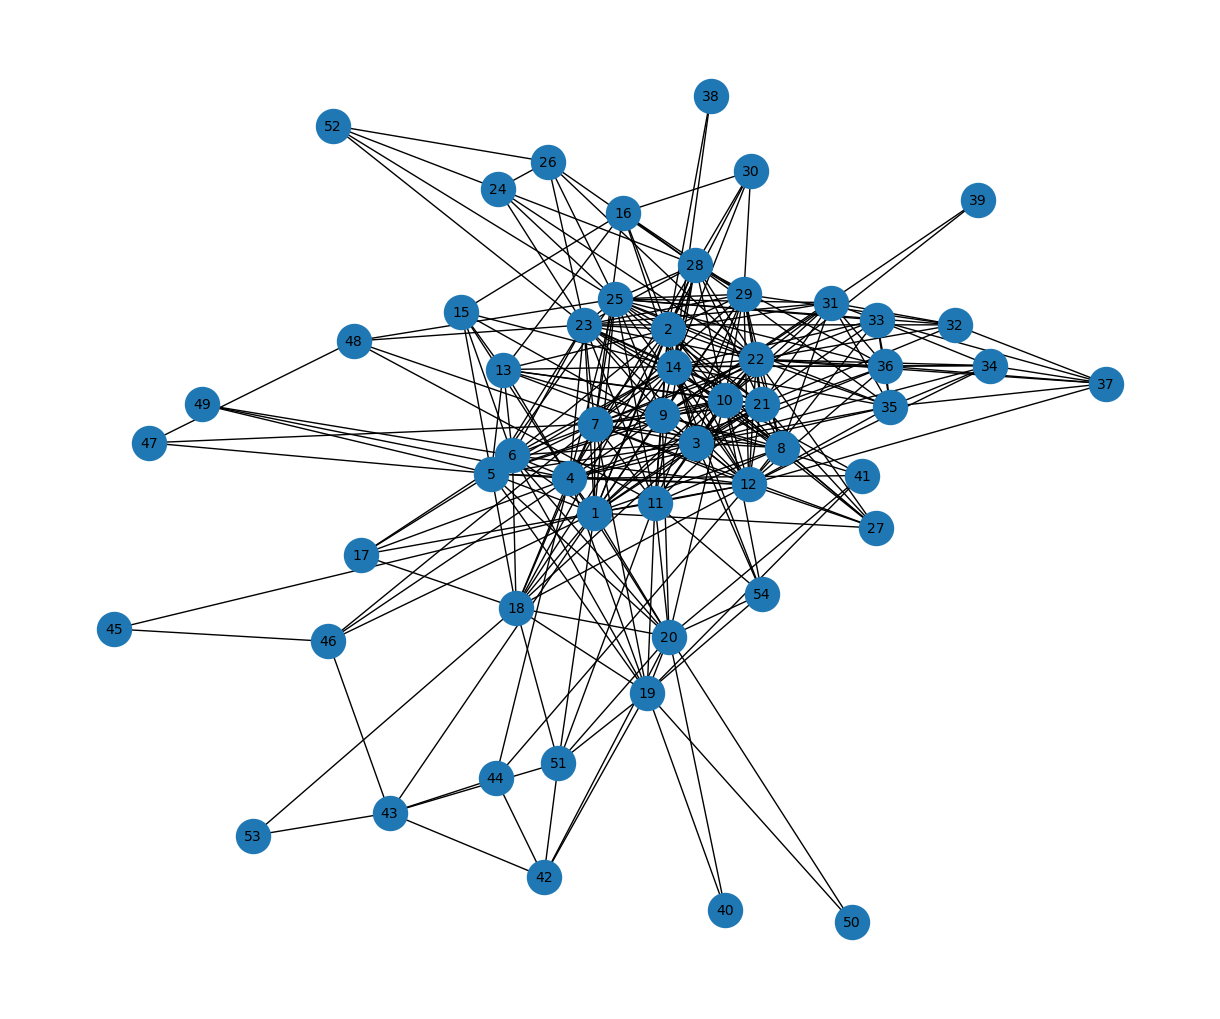

In [4]:
# Calcolo centralità
centrality = nx.degree_centrality(G)
print(centrality)

# Layout con nodi più distanti
pos = nx.spring_layout(G, k=0.5, iterations=50)

plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_size=600, font_size=10)
plt.show()

## Within-network analysis (internal analysis of the gangs)

### A. General structural metrics
- **Density**
  - **What it is:** Ratio between existing ties and all possible ties.
  - **Why useful:** Measures cohesion; high density → easier communication and lower vulnerability to central node removal.

- **Average degree**
  - **What it is:** Average number of connections per node.
  - **Why useful:** Indicates member activity and level of engagement.

- **Network diameter and average path length**
  - **What it is:** Maximum/average length of paths between nodes.
  - **Why useful:** Measures the network's efficiency in transmitting information or orders.

- **Clustering coefficient**
  - **What it is:** Probability that a node's neighbors are connected to each other.
  - **Why useful:** Highlights closed subgroups or internal "cells"; useful for understanding resilience and community str

- **Modularity**
  - **What it is:** Measure of the presence of well-defined internal communities.
  - **Why useful:** Reveals internal divisions and possible subgroups or "cliques".

### B. Centrality metrics
- **Degree centrality**
  - **What it is:** Number of direct connections a node has.
  - **Why useful:** Identifies the most active or influential members.

- **Betweenness centrality**
  - **What it is:** Number of times a node lies on the shortest paths between other nodes.
  - **Why useful:** Highlights brokers or gatekeepers; nodes critical for the flow of information.


- **Closeness centrality**
  - **What it is:** Reciprocal of the sum of a node's distances to all other nodes.
  - **Why useful:** A node close to all others can quickly spread information or orders.

- **Eigenvector centrality / PageRank**
  - **What it is:** Importance based on being connected to other important nodes.
  - **Why useful:** Highlights leaders recognized by the most influential members.

### C. Roles and vulnerability
- **Identification of key roles (leader, broker, peripheral members)**
  - **Metrics:** Combination of centrality, degree, betweenness, and clustering.
  - **Why useful:** Identifies who leads, who mediates between subgroups, and who remains peripheral.


- **Cohesion / network robustness**
  - **Metrics:** Density, average path length, k-core decomposition.
  - **Why useful:** Vulnerability testing: impact of removing central nodes.


- **K-core / core-periphery structure**
  - **What it is:** Identifies the central core versus the periphery.
  - **Why useful:** Highlights implicit hierarchy and concentration of power.
